In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [ ]:
data=pd.read_csv("/content/train.csv",
                 index_col='timestamp',parse_dates=['timestamp'])
data.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
timestamp,,,,,,,,,,,,,,,
2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [ ]:
dtypes={'timestamp':'object', 'active_power_calculated_by_converter':'float32', 'active_power_raw':'float32',
       'ambient_temperature':'float32', 'generator_speed':'float32', 'generator_winding_temp_max':'float32',
       'grid_power10min_average':'float32', 'nc1_inside_temp':'float32', 'nacelle_temp':'float32',
       'reactice_power_calculated_by_converter':'float32', 'reactive_power':'float32',
       'wind_direction_raw':'float32', 'wind_speed_raw':'float32', 'wind_speed_turbulence':'float32',
       'turbine_id':'category', 'Target':'float32'}

data=pd.read_csv("/content/train.csv",
                 index_col='timestamp',parse_dates=['timestamp'],dtype=dtypes)

In [ ]:
dTurbine_01=data[data['turbine_id']=="Turbine_01"]

In [ ]:
dTurbine_01.shape

(54171, 15)

In [ ]:
dTurbine_01.index=pd.to_datetime(dTurbine_01.index,format='%Y-%m-%d %H')

In [ ]:
dTurbine_01.sort_index(inplace=True)

<ipython-input-154-316327531c28>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<font color=red>To find whether the regular interval of time series can be on hourly basis</font>

In [ ]:
dTurbine_01.index

DatetimeIndex(['2021-01-01 20:27:00', '2021-01-01 20:30:00',
               '2021-01-01 20:35:00', '2021-01-01 20:36:00',
               '2021-01-01 20:37:00', '2021-01-01 20:38:00',
               '2021-01-01 20:41:00', '2021-01-01 20:42:00',
               '2021-01-01 20:47:00', '2021-01-01 20:56:00',
               ...
               '2021-12-31 22:49:00', '2021-12-31 22:51:00',
               '2021-12-31 23:03:00', '2021-12-31 23:05:00',
               '2021-12-31 23:08:00', '2021-12-31 23:16:00',
               '2021-12-31 23:30:00', '2021-12-31 23:31:00',
               '2021-12-31 23:33:00', '2021-12-31 23:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=54171, freq=None)

In [ ]:
# d_1jan=dTurbine_01[(dTurbine_01.index.month==1)and(dTurbine_01.index.day==1)]
arr=np.logical_and(dTurbine_01.index.month==1,dTurbine_01.index.day==1)

In [ ]:
arr

array([ True,  True,  True, ..., False, False, False])

In [ ]:
d_1jan=dTurbine_01[arr]

In [ ]:
d_1jan.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
timestamp,,,,,,,,,,,,,,,
2021-01-01 20:27:00,716.153625,738.391174,12.833890,1113.618652,52.250389,643.019775,30.480120,24.793364,140.667740,174.028030,51.831135,7.345428,0.318483,Turbine_01,46.682571
2021-01-01 20:30:00,668.484070,691.595581,12.827969,1089.887207,52.109486,660.632812,30.429287,24.774328,135.837692,169.279572,50.499496,7.607543,0.297538,Turbine_01,46.645905
2021-01-01 20:35:00,619.715027,637.734863,12.800751,1061.761108,52.671341,658.606689,30.293150,24.653873,125.420776,159.777908,51.727501,7.150571,0.309950,Turbine_01,46.645744
2021-01-01 20:36:00,607.128601,627.410767,12.779938,1054.729614,52.599617,656.049316,30.243378,24.675203,131.538300,160.707367,52.921501,7.139572,0.324575,Turbine_01,46.617508
2021-01-01 20:37:00,619.598450,638.911377,12.773916,1061.468140,52.472519,653.701050,30.214264,24.657110,134.686478,164.216827,52.537315,7.302331,0.308070,Turbine_01,46.633438


In [ ]:
np.unique(d_1jan.index.hour)

array([20, 21, 22, 23])

In [ ]:
np.unique(dTurbine_01.index.day)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

**CONCLUSION**<BR>
<font color=blue>since we don't have each hour of the day for each day.<br>we can't use hour as a time interval.</br></font>

<font color=red>To make our analysis with data easy and efficient we are going  to use sqlite3 python framework to implement sql.<br>Also,putting missing dates in the  data.

In [ ]:
dTurbine_01['Date']=dTurbine_01.index.date

<ipython-input-162-4c273297ae0c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dTurbine_01['Date']

timestamp
2021-01-01 20:27:00    2021-01-01
2021-01-01 20:30:00    2021-01-01
2021-01-01 20:35:00    2021-01-01
2021-01-01 20:36:00    2021-01-01
2021-01-01 20:37:00    2021-01-01
                          ...    
2021-12-31 23:16:00    2021-12-31
2021-12-31 23:30:00    2021-12-31
2021-12-31 23:31:00    2021-12-31
2021-12-31 23:33:00    2021-12-31
2021-12-31 23:50:00    2021-12-31
Name: Date, Length: 54171, dtype: object

In [ ]:
dTurbine_01.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target', 'Date'],
      dtype='object')

In [ ]:
import sqlite3

In [ ]:
conn=sqlite3.connect('test_database_1')
cur=conn.cursor()

In [ ]:
cur.execute('CREATE TABLE IF NOT EXISTS DTurbine_01(active_power_calculated_by_converter, active_power_raw,ambient_temperature, generator_speed, generator_winding_temp_max,grid_power10min_average, nc1_inside_temp, nacelle_temp,reactice_power_calculated_by_converter, reactive_power,wind_direction_raw, wind_speed_raw, wind_speed_turbulence,turbine_id, Target,Date)')
conn.commit()

In [ ]:
dTurbine_01.to_sql('DTurbine_01',conn,if_exists='replace',index=True,index_label=['timestamp'])

54171

In [ ]:
cur.execute('''
   SELECT Date,turbine_id,AVG(Target) FROM DTurbine_01
   GROUP BY Date
   ''')

In [ ]:
dNew_01=pd.DataFrame(cur.fetchall(),columns=['Date','turbine_id','avg_Target'])

<h1><font color='purple'><b>Multivariate Time Series</b></font></h1>

In [ ]:
dTurbine_01.head(2)

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,Date
timestamp,,,,,,,,,,,,,,,,
2021-01-01 20:27:00,716.153625,738.391174,12.833890,1113.618652,52.250389,643.019775,30.480120,24.793364,140.66774,174.028030,51.831135,7.345428,0.318483,Turbine_01,46.682571,2021-01-01
2021-01-01 20:38:00,630.513916,649.101624,12.770711,1067.620850,52.271442,652.938110,30.194574,24.631500,130.99025,166.114319,52.886063,7.507572,0.333520,Turbine_01,46.611885,2021-01-01


In [ ]:
cur.execute('''
   SELECT Date,turbine_id,AVG(active_power_calculated_by_converter),AVG(active_power_raw),AVG(ambient_temperature),AVG(generator_speed),
   AVG(generator_winding_temp_max),AVG(grid_power10min_average),AVG(nc1_inside_temp),AVG(nacelle_temp),
   AVG(reactice_power_calculated_by_converter),AVG(reactive_power),AVG(wind_direction_raw),AVG(wind_speed_raw),AVG(wind_speed_turbulence),
   AVG(Target) FROM DTurbine_01
   GROUP BY Date
   ''')

In [ ]:
data.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

In [ ]:
data_mv=pd.DataFrame(cur.fetchall(),columns=['Date','turbine_id','active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max','grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp','reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'Target'])

In [ ]:
data_mv.isnull().sum()

Date                                      0
turbine_id                                0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
Target                                    0
dtype: int64

In [ ]:
data_mv.shape

(351, 16)

In [ ]:
data_mv.head()

,Date,turbine_id,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,2021-01-01,Turbine_01,515.135620,528.020604,12.653049,989.437636,53.134246,533.605884,29.232762,24.438631,122.450394,151.046875,49.285138,6.873621,0.345558,46.756965
1,2021-01-02,Turbine_01,242.046833,244.561774,12.648963,841.609660,45.519322,222.844642,28.595353,24.439168,98.228780,114.999430,41.031544,5.059726,0.393491,45.989674
2,2021-01-03,Turbine_01,198.248418,202.726076,12.184353,827.521644,48.033284,205.618807,27.601759,23.387642,96.280394,112.187149,49.615854,5.003497,0.345447,45.946105
3,2021-01-15,Turbine_01,151.472192,157.879971,16.590205,763.986206,46.826955,126.193919,32.316927,29.237328,93.335930,107.212178,43.782910,5.181084,0.337958,48.167165
4,2021-01-16,Turbine_01,294.870429,296.898246,22.390095,870.482881,49.280830,277.858467,30.895856,26.853914,106.429406,127.353516,64.282560,5.462210,0.420109,46.430029


<h2><b>Check for stationarity</b><h2

```
# This is formatted as code
```

>

In [ ]:
from statsmodels.tsa.api import adfuller
for i in range(len(data_mv.columns[2:])):
  result=adfuller(data_mv[data_mv.columns[i+2]])

  if result[1]>0.05:
    print('{} - series is not stationary'.format(data_mv.columns[i+2]))

  else:
    print('{} - series is stationary'.format(data_mv.columns[i+2]))

active_power_calculated_by_converter - series is stationary
active_power_raw - series is stationary
ambient_temperature - series is not stationary
generator_speed - series is stationary
generator_winding_temp_max - series is not stationary
grid_power10min_average - series is stationary
nc1_inside_temp - series is stationary
nacelle_temp - series is not stationary
reactice_power_calculated_by_converter - series is stationary
reactive_power - series is stationary
wind_direction_raw - series is not stationary
wind_speed_raw - series is stationary
wind_speed_turbulence - series is stationary
Target - series is not stationary


In [ ]:
data_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    351 non-null    object 
 1   turbine_id                              351 non-null    object 
 2   active_power_calculated_by_converter    351 non-null    float64
 3   active_power_raw                        351 non-null    float64
 4   ambient_temperature                     351 non-null    float64
 5   generator_speed                         351 non-null    float64
 6   generator_winding_temp_max              351 non-null    float64
 7   grid_power10min_average                 351 non-null    float64
 8   nc1_inside_temp                         351 non-null    float64
 9   nacelle_temp                            351 non-null    float64
 10  reactice_power_calculated_by_converter  351 non-null    float6

<h2><b>making stationary</b><h2

In [ ]:
nobs=4
df_train,df_test=data_mv[0:-nobs],data_mv[-nobs:]
df_differenced=df_train.select_dtypes(include=['float64']).diff().dropna()
df_differenced.head()
for i in range(len(df_differenced.columns)):
  result=adfuller(df_differenced[df_differenced.columns[i]])

  if result[1]>0.05:
    print('{} - series is not stationary'.format(df_differenced.columns[i]))

  else:
    print('{} - series is stationary'.format(df_differenced.columns[i]))

active_power_calculated_by_converter - series is stationary
active_power_raw - series is stationary
ambient_temperature - series is stationary
generator_speed - series is stationary
generator_winding_temp_max - series is stationary
grid_power10min_average - series is stationary
nc1_inside_temp - series is stationary
nacelle_temp - series is stationary
reactice_power_calculated_by_converter - series is stationary
reactive_power - series is stationary
wind_direction_raw - series is stationary
wind_speed_raw - series is stationary
wind_speed_turbulence - series is stationary
Target - series is stationary


<h2><b>Selecting order(P) of VAR model</b><h2

In [ ]:
from statsmodels.tsa.api import VAR
model=VAR(df_differenced)
x=model.select_order(maxlags=12)
x.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


,AIC,BIC,FPE,HQIC
0,27.66,27.82*,1.032e+12,27.73
1,25.99,28.38,1.934e+11,26.94*
2,25.54,30.17,1.239e+11,27.38
3,25.51*,32.38,1.222e+11*,28.25
4,25.62,34.73,1.410e+11,29.26
5,25.91,37.25,1.957e+11,30.43
6,26.10,39.68,2.538e+11,31.51
7,26.45,42.26,3.950e+11,32.75
8,26.66,44.72,5.611e+11,33.86
9,26.73,47.02,7.151e+11,34.82


<h1><b>Train the VAR Model of selected order(p)<b></h1>

In [ ]:
model_fitted=model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Feb, 2023
Time:                     04:28:43
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                    37.7829
Nobs:                     343.000    HQIC:                   33.7303
Log likelihood:          -11536.3    FPE:                3.10257e+13
AIC:                      31.0473    Det(Omega_mle):     5.93768e+12
--------------------------------------------------------------------
Results for equation active_power_calculated_by_converter
                                               coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------
const                                             0.813251        10.208481            0.080           0.937
L1.active_power_calculated

<h1><b>Selecting relevant features for the prediction of y(Target variable)</b></h1>

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

y='Target'
max_lags=3
for i in range(len(df_differenced.columns)-1):
  results=grangercausalitytests(df_differenced[[y,df_differenced.columns[i]]],max_lags,verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('column - {} : P_Values - {}'.format(df_differenced.columns[i+1],p_values))

column - active_power_raw : P_Values - [0.1154, 0.2583, 0.3452]
column - ambient_temperature : P_Values - [0.1015, 0.2343, 0.3149]
column - generator_speed : P_Values - [0.033, 0.1548, 0.1834]
column - generator_winding_temp_max : P_Values - [0.6625, 0.4627, 0.4696]
column - grid_power10min_average : P_Values - [0.3153, 0.3531, 0.4977]
column - nc1_inside_temp : P_Values - [0.1633, 0.3146, 0.4025]
column - nacelle_temp : P_Values - [0.0842, 0.3169, 0.5252]
column - reactice_power_calculated_by_converter : P_Values - [0.1907, 0.4316, 0.5284]
column - reactive_power : P_Values - [0.1567, 0.328, 0.4418]
column - wind_direction_raw : P_Values - [0.147, 0.3145, 0.4288]
column - wind_speed_raw : P_Values - [0.1513, 0.0217, 0.047]
column - wind_speed_turbulence : P_Values - [0.1522, 0.236, 0.4329]
column - Target : P_Values - [0.032, 0.1449, 0.2537]


In [ ]:
# df_train.select_dtypes(include=['float64'])
from statsmodels.tsa.stattools import grangercausalitytests
df_numeric=df_train.select_dtypes(include=['float64'])
y='Target'
max_lags=3
for i in range(len(df_numeric)-1):
  results=grangercausalitytests(df_numeric[[y,df_numeric.columns[i]]],max_lags,verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('column - {} : P_Values - {}'.format(df_numeric.columns[i],p_values))

column - active_power_calculated_by_converter : P_Values - [0.898, 0.373, 0.5191]
column - active_power_raw : P_Values - [0.8967, 0.3417, 0.4808]
column - ambient_temperature : P_Values - [0.3582, 0.0793, 0.1415]
column - generator_speed : P_Values - [0.888, 0.8132, 0.7332]
column - generator_winding_temp_max : P_Values - [0.6962, 0.471, 0.4799]
column - grid_power10min_average : P_Values - [0.9765, 0.4748, 0.6006]
column - nc1_inside_temp : P_Values - [0.3406, 0.0566, 0.1587]
column - nacelle_temp : P_Values - [0.1693, 0.1492, 0.1355]
column - reactice_power_calculated_by_converter : P_Values - [0.2073, 0.1093, 0.2744]
column - reactive_power : P_Values - [0.2714, 0.139, 0.3069]
column - wind_direction_raw : P_Values - [0.4002, 0.1105, 0.0263]
column - wind_speed_raw : P_Values - [0.9803, 0.4618, 0.4614]
column - wind_speed_turbulence : P_Values - [0.438, 0.1506, 0.3008]
column - Target : P_Values - [1.0, 1.0, 1.0]


IndexError: ignored

<h1><b><font color='red'>*****************FINISH***********************</font></b></h1>

<h1><b><font color='red'>*****************FINISH***********************</font></b></h1>

In [ ]:

# d_ALDR=data_mv.copy()
# d_ALDR.set_index(data_mv['Date'],inplace=True)
# d_ALDR.index=pd.to_datetime(d_ALDR.index)

In [ ]:
# d_ALDR.index
# d_ALDR=d_ALDR.resample('d').mean()

In [ ]:
# d_ALDR.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
Date,,,,,,,,,,,,,,
2021-01-01,514.379880,527.268918,12.656318,989.407458,53.128666,533.887291,29.232669,24.448870,122.676631,151.221675,48.825283,6.798447,0.364133,46.753929
2021-01-02,257.439371,263.150614,12.527712,852.456224,46.551896,243.541707,28.414693,24.199912,99.999920,118.449376,38.895640,5.169766,0.384063,46.078418
2021-01-03,213.710271,217.022307,12.111230,826.764154,47.728809,216.989039,27.447457,23.243477,98.603086,115.746845,47.957691,5.107267,0.355222,45.977852
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dff=dd.copy()
# dff.head()
# dff.index

In [ ]:
# d_ALDR.interpolate(method='polynomial',order=3,axis=0,limit=14,inplace=True)

In [ ]:
# d_ALDR.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
Date,,,,,,,,,,,,,,
2021-01-01,514.379880,527.268918,12.656318,989.407458,53.128666,533.887291,29.232669,24.448870,122.676631,151.221675,48.825283,6.798447,0.364133,46.753929
2021-01-02,257.439371,263.150614,12.527712,852.456224,46.551896,243.541707,28.414693,24.199912,99.999920,118.449376,38.895640,5.169766,0.384063,46.078418
2021-01-03,213.710271,217.022307,12.111230,826.764154,47.728809,216.989039,27.447457,23.243477,98.603086,115.746845,47.957691,5.107267,0.355222,45.977852
2021-01-04,188.188543,191.924016,11.426277,808.759435,49.322389,208.171585,27.052551,23.006706,97.496436,113.739416,54.698811,5.217964,0.318344,46.297606
2021-01-05,146.603988,152.733430,10.565348,780.711802,50.010192,174.008113,27.263401,23.606693,93.251649,107.589866,55.883795,5.239909,0.282795,46.926457


In [ ]:
def time_delay_embedding(series: pd.Series, n_lags: int, horizon: int):
    """
    Time delay embedding
    Time series for supervised learning
    :param series: time series as pd.Series
    :param n_lags: number of past values to used as explanatory variables
    :param horizon: how many values to forecast
    :return: pd.DataFrame with reconstructed time series
    """
    assert isinstance(series, pd.Series)

    if series.name is None:
        name = 'Series'
    else:
        name = series.name

    n_lags_iter = list(range(n_lags, -horizon, -1))

    X = [series.shift(i) for i in n_lags_iter]
    X = pd.concat(X, axis=1).dropna()
    X.columns = [f'{name}(t-{j - 1})'
                 if j > 0 else f'{name}(t+{np.abs(j) + 1})'
                 for j in n_lags_iter]

    return X

In [ ]:
colnames=d_ALDR.columns.tolist()

d_aldr_ds=[]
for col in d_ALDR:
  col_df=time_delay_embedding(d_ALDR[col],n_lags=24,horizon=12)
  d_aldr_ds.append(col_df)


  print(col)

active_power_calculated_by_converter
active_power_raw
ambient_temperature
generator_speed
generator_winding_temp_max
grid_power10min_average
nc1_inside_temp
nacelle_temp
reactice_power_calculated_by_converter
reactive_power
wind_direction_raw
wind_speed_raw
wind_speed_turbulence
Target


In [ ]:
d_aldr_ds=[]
col_df=time_delay_embedding(d_ALDR[col],n_lags=24,horizon=12)
d_aldr_ds.append(col_df)
d_aldr_ds

TypeError: ignored

<H1><FONT COLOR="PURPLE"><B>*****************************************FINISH**************************************</B></H1></FONT>

In [ ]:
dNew_01.head()

,Date,turbine_id,avg_Target
0,2021-01-01,Turbine_01,46.742106
1,2021-01-02,Turbine_01,46.106314
2,2021-01-03,Turbine_01,45.898575
3,2021-01-15,Turbine_01,48.071368
4,2021-01-16,Turbine_01,46.475955


In [ ]:
dd=dNew_01
dd.set_index(dNew_01['Date'],inplace=True)
dd.index=pd.to_datetime(dd.index)

In [ ]:
dd.index
dd=dd.resample('d').mean()

In [ ]:
dd.head()
# dd.tail()

,avg_Target
Date,
2021-01-01,46.742106
2021-01-02,46.106314
2021-01-03,45.898575
2021-01-04,NaN
2021-01-05,NaN


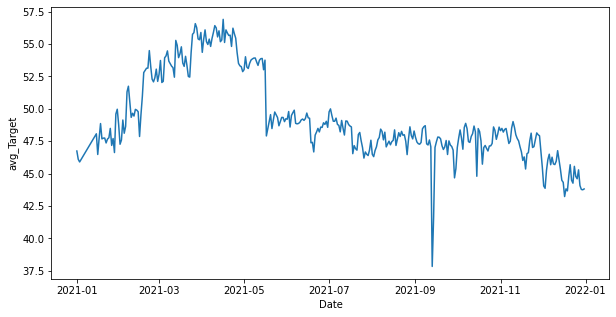

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.lineplot(y=dd['avg_Target'],x=dd.index)
plt.show()

In [ ]:
dd.shape

(365, 1)

In [ ]:
import plotly.express as px

fig=px.line(dd,x=dd.index,y='avg_Target',title='slide and SEE')

fig.update_xaxes(
    rangeslider_visible=True
)

fig.show()

In [ ]:
df=dd.copy()
df=df.dropna()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

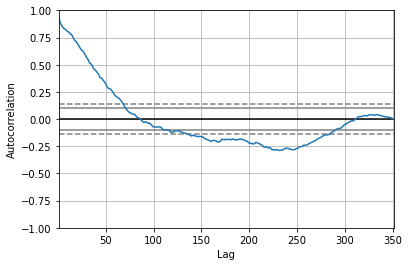

In [ ]:
pd.plotting.autocorrelation_plot(df['2021-01-01':'2021-12-31']['avg_Target'])

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

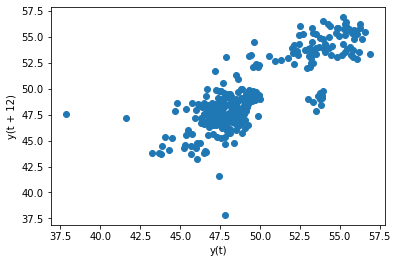

In [ ]:
pd.plotting.lag_plot(df['avg_Target'],lag=12)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

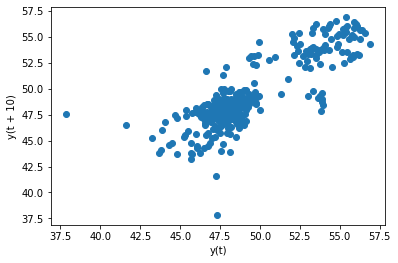

In [ ]:
pd.plotting.lag_plot(df['avg_Target'],lag=10)

<font color=red><h3>**Handling Missing Values**</h3><h4><br>Since we have null values in the starting of the series and also a good relation is shown for more than 10 data points, we can't use the rolling statistics.
<br>So we will use interpolation.

In [ ]:
dff=dd.copy()
dff.head()
dff.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [ ]:
# dff.to_xlsx(r"C:\Users\Sheetal\Documents\dataset\ReNew_Participants_Data\ReNew_Participants_Data\Turbine_01.xlsx",index=True,header=True)

In [ ]:
# from scipy import interpolate
dff.interpolate(method='polynomial',order=3,axis=0,limit=14,inplace=True)

In [ ]:
dff.head()

,avg_Target
Date,
2021-01-01,46.742106
2021-01-02,46.106314
2021-01-03,45.898575
2021-01-04,46.108838
2021-01-05,46.653550


In [ ]:
import plotly.express as px

fig=px.line(dff,x=dd.index,y='avg_Target',title='slide and SEE')

fig.update_xaxes(
    rangeslider_visible=True
)

fig.show()

In [ ]:
Test_data=dff.tail()
Test_data

,avg_Target
Date,
2021-12-27,45.287792
2021-12-28,44.081540
2021-12-29,43.777394
2021-12-30,43.749912
2021-12-31,43.815648


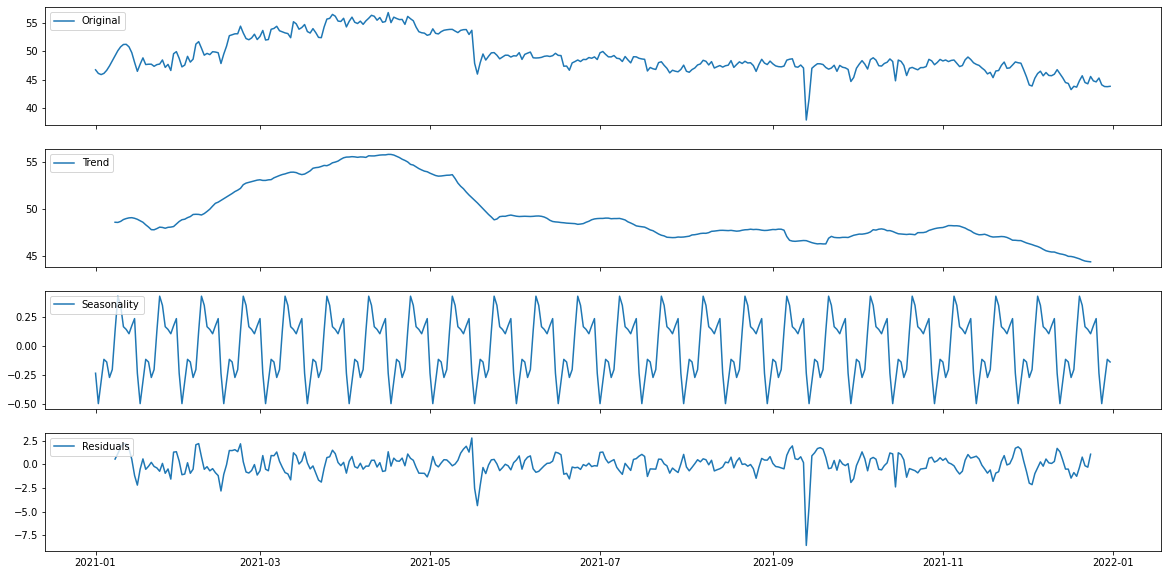

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decomposition = seasonal_decompose(x=dff['avg_Target'], model='additive', period=15)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(dff, label='Original')
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

<font color=blue>from above we can say data is non statinary GRAPHICALLY</font>

In [ ]:
testing_data=dff.tail()
dff.drop(['2021-12-27','2021-12-28','2021-12-29','2021-12-30','2021-12-31'],axis=0,inplace=True)

In [ ]:
testing_data

,avg_Target
Date,
2021-12-27,45.287792
2021-12-28,44.081540
2021-12-29,43.777394
2021-12-30,43.749912
2021-12-31,43.815648


In [ ]:
dff.tail()

,avg_Target
Date,
2021-12-22,44.485262
2021-12-23,44.260753
2021-12-24,45.558432
2021-12-25,44.781287
2021-12-26,44.601301


<font color=red><h2>**ARIMA MODEL**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(dff['avg_Target'])
print('ADF Statistics: %.3f'%result[0])
print('p-value: %f'%result[1])
print('critical Values: ')
for key,value in result[4].items():
  print('\t%s: %.3f'%(key,value))

ADF Statistics: -1.402
p-value: 0.581217
critical Values: 
	1%: -3.449
	5%: -2.870
	10%: -2.571


<font color=blue> since adf statistic > all 3 critical values <br>p-value >0.05</br><br>TimeSeries is not stationary</br></font>

In [ ]:
dff['difference_1']=dff['avg_Target']-dff['avg_Target'].shift(1)

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# ts_dicomposition = seasonal_decompose(x=dff['difference_1'], model='additive', period=15)
# trend_estimate = ts_dicomposition.trend
# seasonal_estimate = ts_dicomposition.seasonal
# residual_estimate = ts_dicomposition.resid

# fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
# fig.set_figheight(10)
# fig.set_figwidth(20)
# # First plot to the Original time series
# axes[0].plot(dff['difference_1'], label='Original')
# axes[0].legend(loc='upper left');
# # second plot to be for trend
# axes[1].plot(trend_estimate, label='Trend')
# axes[1].legend(loc='upper left');
# # third plot to be Seasonality component
# axes[2].plot(seasonal_estimate, label='Seasonality')
# axes[2].legend(loc='upper left');
# # last last plot to be Residual component
# axes[3].plot(residual_estimate, label='Residuals')
# axes[3].legend(loc='upper left');

In [ ]:
dff.dropna(axis=0,inplace=True)
result = adfuller(dff['difference_1'])
print('ADF Statistics: %.3f'%result[0])
print('p-value: %f'%result[1])
print('critical Values: ')
for key,value in result[4].items():
  print('\t%s: %.3f'%(key,value))

ADF Statistics: -10.033
p-value: 0.000000
critical Values: 
	1%: -3.449
	5%: -2.870
	10%: -2.571


<Axes: xlabel='Date'>

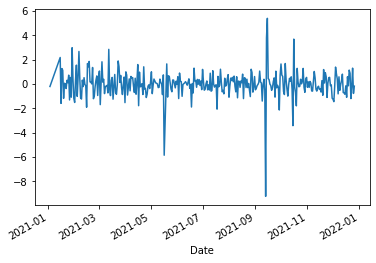

In [ ]:
dff['difference_1'].plot()

<font color=blue> since adf statistic < all 3 critical values <br>p-value <0.05</br><br>TimeSeries is  stationary</br></font>

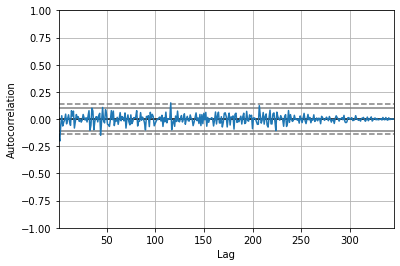

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dff['difference_1'])
plt.show()

<font color=blue>No correlation in differenced stationary data</font>

<font color=green><h2>**Auto regressive Model**</h2></font>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



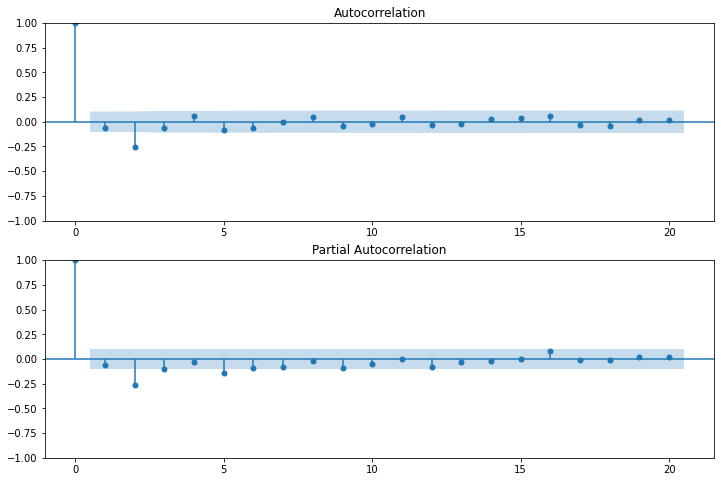

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(dff['difference_1'],lags=20,ax=ax1)

ax2=fig.add_subplot(212)
fig=plot_pacf(dff['difference_1'],lags=20,ax=ax2)

<font color=blue>**FROM PACF GRAPH <BR>p = 2 as there is significant drop that is cut off after p=2.**</font><BR></BR>
<font color=blue>**FROM ACF GRAPH <BR>q= 2 as there is significant drop that is cut off after q=2.**</font></BR>

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# model=ARIMA(dff['avg_Target'],order=(2,2,0))
import statsmodels.api as sm
model= sm.tsa.arima.ARIMA(dff['avg_Target'], order=(2,1,2))
result = model.fit()
# model_fit=model.fit()

In [ ]:
dff['difference_1'].head()

Date
2021-01-02   -0.635792
2021-01-03   -0.207739
2021-01-04    0.210263
2021-01-05    0.544712
2021-01-06    0.777234
Freq: D, Name: difference_1, dtype: float64

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             avg_Target   No. Observations:                  359
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -513.248
Date:                Sun, 19 Mar 2023   AIC                           1036.496
Time:                        20:06:06   BIC                           1055.899
Sample:                    01-02-2021   HQIC                          1044.213
                         - 12-26-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3503      0.360      0.974      0.330      -0.355       1.056
ar.L2          0.0185      0.276      0.067      0.947      -0.523       0.560
ma.L1         -0.4921      0.356     -1.384      0.166      -1.189       0.205
ma.L2         -0.2628      0.327     -0.803      0.422      -0.904       0.378
sigma2         1.0288      0.022     46.511      0.000       0.985       1.072
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8001.71
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                            -2.58
Prob(H) (two-sided):                  0.01   Kurtosis:                        25.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# model_2=ARIMA(dff['avg_Target'],order=(1,1,0))
# model_fit_2=model_2.fit()

In [ ]:
# model_fit_2.summary()

In [ ]:
dff['predicted']=result.predict(dynamic=False)

In [ ]:
print("PREDICTED VALUES\n",dff['predicted'].tail())
print('*'*30)
print("ACTUAL VALUES \n",dff['avg_Target'].tail())

PREDICTED VALUES
 Date
2021-12-22    45.431576
2021-12-23    44.355753
2021-12-24    44.455311
2021-12-25    45.490983
2021-12-26    44.592428
Freq: D, Name: predicted, dtype: float64
******************************
ACTUAL VALUES 
 Date
2021-12-22    44.485262
2021-12-23    44.260753
2021-12-24    45.558432
2021-12-25    44.781287
2021-12-26    44.601301
Freq: D, Name: avg_Target, dtype: float64


<Figure size 1440x1440 with 0 Axes>

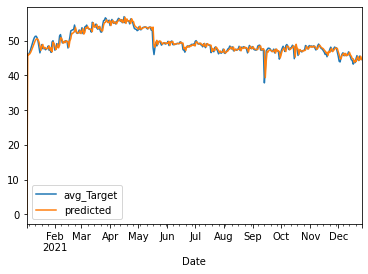

In [ ]:
plt.figure(figsize=(20,20))
dff[['avg_Target','predicted']].plot()
plt.show()

In [ ]:
forecast=result.predict(start='2021-12-27',end='2021-12-31',dynamic=True)

In [ ]:
print("PREDICTED VALUES\n",forecast)
print('*'*30)
print("ACTUAL VALUES \n",testing_data)

PREDICTED VALUES
 2021-12-27    44.705991
2021-12-28    44.737006
2021-12-29    44.749808
2021-12-30    44.754866
2021-12-31    44.756875
Freq: D, Name: predicted_mean, dtype: float64
******************************
ACTUAL VALUES 
             avg_Target
Date                  
2021-12-27   45.287792
2021-12-28   44.081540
2021-12-29   43.777394
2021-12-30   43.749912
2021-12-31   43.815648


<h1><b>***************************PROJECT FINISHED************************<b></h1>

In [ ]:
def inverse_difference(history,yhat,interval=1):
  return yhat+history[-interval]

In [ ]:
start_index = dff.shape[0]
end_index = start_index + 4
forecastt=result.predict(start=start_index,end=end_index)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
Series=dff['avg_Target'].squeeze()
X=Series.values
history=[x for x in X]
day=1
for yhat in forecastt:
  inverted=inverse_difference(history,yhat,2)
  print('day %d --> %f'%(day,inverted))
  history.append(inverted)
  day+=1

day 1 --> 89.462300
day 2 --> 89.320896
day 3 --> 134.194295
day 4 --> 134.056826
day 5 --> 178.931473


In [ ]:
Test_data

,avg_Target
Date,
2021-12-27,45.287792
2021-12-28,44.081540
2021-12-29,43.777394
2021-12-30,43.749912
2021-12-31,43.815648


In [ ]:
start_index = 5
end_index = dff.shape[0] + 4
forecastt=result.predict(start=start_index,end=end_index)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
Series=dff['avg_Target'].head().squeeze()
X=Series.values
# predicted=[]
history=[x for x in X]
day=1
for yhat in forecastt:
  inverted=inverse_difference(history,yhat,2)
  # print('day %d --> %f'%(day,inverted))
  history.append(inverted)
  day+=1

In [ ]:
for i in range(0,4):
  np.insert(history,i,X[i])

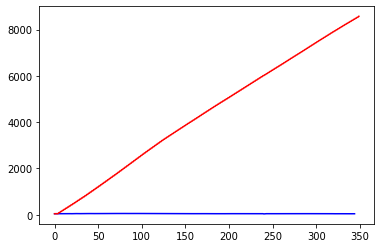

In [ ]:
plt.plot([x for x in range(0,dff['avg_Target'].shape[0])],dff['avg_Target'], color='blue')
plt.plot([x for x in range(0,dff['avg_Target'].shape[0]+5)],history, color='red')
plt.show()

In [ ]:
dff.head()

,avg_Target,difference_1,predicted
Date,,,
2021-01-02,46.106314,-0.635792,NaN
2021-01-03,45.898575,-0.207739,NaN
2021-01-15,48.071368,2.172792,-0.001089
2021-01-16,46.475955,-1.595413,-1.135032
2021-01-17,47.737885,1.261930,1.553693


In [ ]:
l=[1,2,3,4,5,6,7]

In [ ]:
np.insert(l, 0,100)

array([100,   1,   2,   3,   4,   5,   6,   7])

In [ ]:
l[-1]

7

<h1><b>MULTIVARIATE TIME SERIES</b></h1>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
DTurbine_01=dTurbine_01.copy()

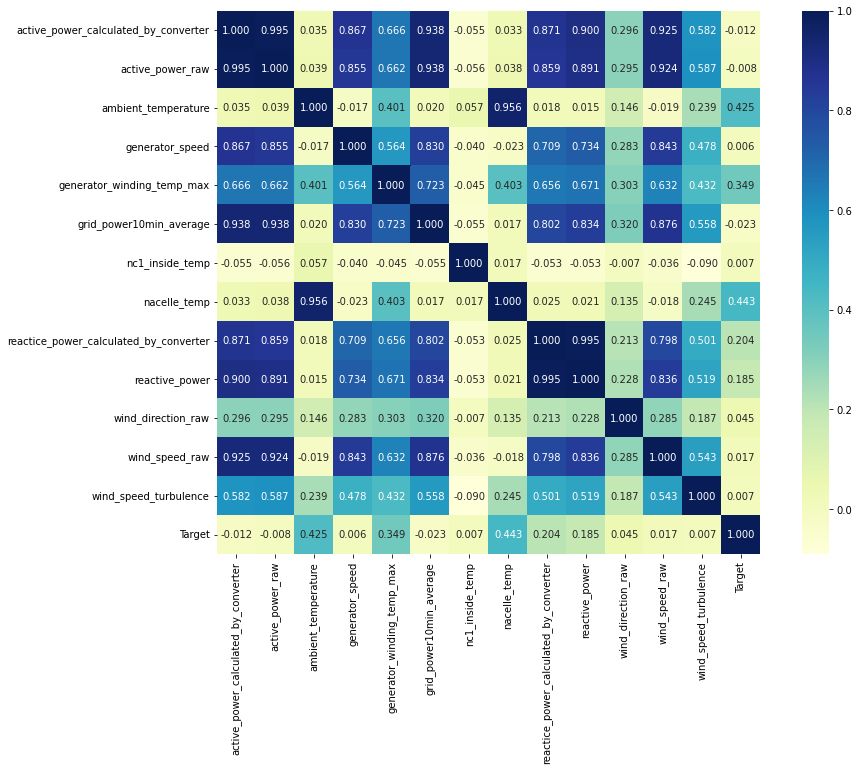

In [ ]:
corr= DTurbine_01.corr()

fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt="0.3f",cmap='YlGnBu',cbar=True,square=True,xticklabels='auto',
    yticklabels='auto')

In [ ]:
features=DTurbine_01.columns

In [ ]:
# def correlation(corr,features,threshold):
#     col_corr=set()  # set of all the names of correlated columns
#     for i in range(len(features)-1):
#         for j in range(i):
#             if abs(corr.iloc[i][j]) > threshold:
#                 col_corr.add(corr.columns[i])
#     return col_corr

# correlation(corr,features,0.95)

{'active_power_raw', 'nacelle_temp', 'reactive_power'}

In [ ]:
ad_fuller_result_1 = adfuller(DTurbine_01['nacelle_temp'].diff()[1:])

print('nacelle temp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(DTurbine_01['ambient_temperature'].diff()[1:])

print('ambient temp')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

nacelle temp
ADF Statistic: -47.95749982973079
p-value: 0.0

---------------------

ambient temp
ADF Statistic: -48.18411310520012
p-value: 0.0


In [ ]:
ad_fuller_result_2 = adfuller(DTurbine_01['Target'].diff()[1:])

print('Target')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Target
ADF Statistic: -47.70083414669033
p-value: 0.0


In [ ]:
print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(DTurbine_01[['ambient_temperature','nacelle_temp']], 5)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(DTurbine_01[['nacelle_temp','ambient_temperature']], 5)

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4294  , p=0.1191  , df_denom=45093, df_num=1
ssr based chi2 test:   chi2=2.4295  , p=0.1191  , df=1
likelihood ratio test: chi2=2.4295  , p=0.1191  , df=1
parameter F test:         F=2.4294  , p=0.1191  , df_denom=45093, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5387  , p=0.2147  , df_denom=45090, df_num=2
ssr based chi2 test:   chi2=3.0777  , p=0.2146  , df=2
likelihood ratio test: chi2=3.0776  , p=0.2146  , df=2
parameter F test:         F=1.5387  , p=0.2147  , df_denom=45090, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0507  , p=0.3688  , df_denom=45087, df_num=3
ssr based chi2 test:   chi2=3.1525  , p=0.3687  , df=3
likelihood ratio test: chi2=3.1523  , p=0.3687  , df=3
parameter F test:         F=1.0507  , p=0.3688  , df_denom=45087, df_num=3

Granger Causality
number of lags (no zero) 4

In [ ]:
train=DTurbine_01[['ambient_temperature','nacelle_temp','Target']]

In [ ]:
train_df=DTurbine_01[:-5]
test_df=DTurbine_01[-5:]

In [ ]:
change_dtype={'ambient_temperature':'float','nacelle_temp':'float','Target':'float'}

In [ ]:
Dturbine=DTurbine_01.astype(dtype=change_dtype)

In [ ]:
# var_model = VAR(train_df)
# fitted_model = var_model.fit(disp=False)
# print(fitted_model.summary())